# New Section

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0


In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 31.08 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam




import numpy as np
import pandas as pd

data=pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape
data.head()

img_width=350
img_height=350
x = []
for i in tqdm(range(data.shape[0])):
  path ='/content/Movies-Poster_Dataset/Images/'+data['Id'][i]+'.jpg'
  img=image.load_img(path, target_size=(img_width, img_height, 3))
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)


x=np.array(x)

  






100%|██████████| 7254/7254 [00:49<00:00, 147.99it/s]


In [ ]:
x.shape

(7254, 350, 350, 3)

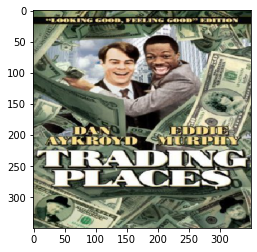

In [ ]:
plt.imshow(x[2])

In [ ]:
data['Genre'][2]

"['Comedy']"

In [ ]:
y=data.drop(['Id','Genre'],axis=1)
y=y.to_numpy()
y.shape



(7254, 25)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)


y_test.shape

(1451, 25)

***BUILDING CNN***

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))


model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.4))



model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())



model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'sigmoid'))





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 172, 172, 32)     1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

In [ ]:
def plot_learningcurve(history, epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()



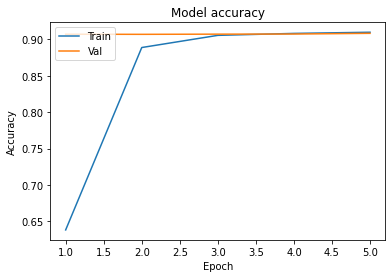

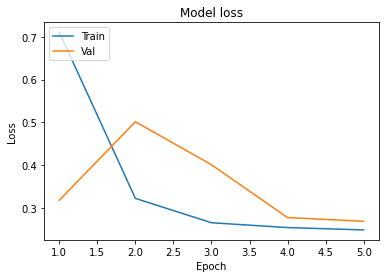

In [ ]:
plot_learningcurve(history, 5)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
[[0.1128574  0.18347347 0.05830184 0.0308114  0.36203825 0.09223196
  0.11923873 0.45173392 0.05554396 0.08938739 0.01411384 0.02571285
  0.02231815 0.0042944  0.02686286 0.0021345  0.00348294 0.00217685
  0.10451809 0.03401676 0.00245464 0.01786765 0.0662967  0.00900474
  0.00545502]]
Drama
Comedy
Adventure


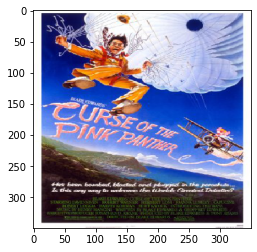

In [ ]:
img=image.load_img('/content/Movies-Poster_Dataset/Images/tt0085384.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255
img=img.reshape(1, img_width, img_height, 3)
classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
print(y_prob)
top_3_prediction = np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
  print(classes[top_3_prediction[i]])




In [ ]:
img=image.load_img('/content/Movies-Poster_Dataset/fast.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255
img
img.shape